In [1]:
from IPython.display import display, HTML
import scipy.constants as sc
from scipy.optimize import fsolve
from ipywidgets import interact, widgets
%matplotlib notebook

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
import h5py

print(os.getpid())
%cd ../../

9381
/media/work/docs/codes/QuCF/scripts-py


In [2]:
# --- Launch to change cells' width ---
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pylib.mix as mix
import pylib.qucf_read as qucf_r
import pylib.qucf_oracle as qucf_o
import pylib.qucf_matrix_D as qucf_m
import kin1d1d as kin
path_ = "../simulations/KIN1D1D/"
path_D_ = "../simulations/KIN1D1D/matrices-D/"
file_name_oracle_ = "circuit_OH"
path_test_ = "../simulations/test-simplified/"
path_cl_ = "../results/KIN1D1D-results/"
path_save_ = "../results/KIN1D1D-results/figs/"
file_name_oracle_ = "circuit_OH"

In [4]:
# ---------------------------------------------------------------
# --- Read matrices D from quantum simulations ---
# ---------------------------------------------------------------
mix.reload_module(qucf_r)

print()
dd_44 = qucf_r.read_matrix_sparse(path_D_, "flat_44_OUTPUT.hdf5") #  nv = 4, nx = 4 

print()
dd_45 = qucf_r.read_matrix_sparse(path_D_, "flat_45_OUTPUT.hdf5") #  nv = 4, nx = 5 

print()
dd_54 = qucf_r.read_matrix_sparse(path_D_, "flat_54_OUTPUT.hdf5") #  nx = 5, nv = 4

print()
dd_55 = qucf_r.read_matrix_sparse(path_D_, "flat_55_OUTPUT.hdf5") #  nx = 5, nv = 5


Reading the matrix from: flat_44_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/matrices-D/
date of the simulation:  06-06-2023 08:57:47
matrix name:  U_BE
N = 512

Reading the matrix from: flat_45_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/matrices-D/
date of the simulation:  06-23-2023 15:42:09
matrix name:  U_BE
N = 1024

Reading the matrix from: flat_54_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/matrices-D/
date of the simulation:  06-23-2023 15:48:52
matrix name:  U_BE
N = 1024

Reading the matrix from: flat_55_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/matrices-D/
date of the simulation:  06-23-2023 15:52:48
matrix name:  U_BE
N = 2048


In [5]:
# ---------------------------------------------------------------
# --- Read matrices from classical simulations ---
# ---------------------------------------------------------------
mix.reload_module(kin)

print("\n --- Classical data (A matrix) ---")

cl_44 = kin.read_matrix_sparse(path_cl_, "out_4_4_w1.2_Lx100_Lv4_flat.hdf5")
cl_45 = kin.read_matrix_sparse(path_cl_, "out_4_5_w1.2_Lx100_Lv4_flat.hdf5")
cl_46 = kin.read_matrix_sparse(path_cl_, "out_4_6_w1.2_Lx100_Lv4_flat.hdf5")
cl_47 = kin.read_matrix_sparse(path_cl_, "out_4_7_w1.2_Lx100_Lv4_flat.hdf5")
cl_48 = kin.read_matrix_sparse(path_cl_, "out_4_8_w1.2_Lx100_Lv4_flat.hdf5")

cl_54 = kin.read_matrix_sparse(path_cl_, "out_5_4_w1.2_Lx100_Lv4_flat.hdf5")
cl_55 = kin.read_matrix_sparse(path_cl_, "out_5_5_w1.2_Lx100_Lv4_flat.hdf5")
cl_56 = kin.read_matrix_sparse(path_cl_, "out_5_6_w1.2_Lx100_Lv4_flat.hdf5")
cl_57 = kin.read_matrix_sparse(path_cl_, "out_5_7_w1.2_Lx100_Lv4_flat.hdf5")
cl_58 = kin.read_matrix_sparse(path_cl_, "out_5_8_w1.2_Lx100_Lv4_flat.hdf5")

cl_64 = kin.read_matrix_sparse(path_cl_, "out_6_4_w1.2_Lx100_Lv4_flat.hdf5")
cl_65 = kin.read_matrix_sparse(path_cl_, "out_6_5_w1.2_Lx100_Lv4_flat.hdf5")
cl_66 = kin.read_matrix_sparse(path_cl_, "out_6_6_w1.2_Lx100_Lv4_flat.hdf5")
cl_67 = kin.read_matrix_sparse(path_cl_, "out_6_7_w1.2_Lx100_Lv4_flat.hdf5")
cl_68 = kin.read_matrix_sparse(path_cl_, "out_6_8_w1.2_Lx100_Lv4_flat.hdf5")

cl_74 = kin.read_matrix_sparse(path_cl_, "out_7_4_w1.2_Lx100_Lv4_flat.hdf5")
cl_75 = kin.read_matrix_sparse(path_cl_, "out_7_5_w1.2_Lx100_Lv4_flat.hdf5")
cl_76 = kin.read_matrix_sparse(path_cl_, "out_7_6_w1.2_Lx100_Lv4_flat.hdf5")
cl_77 = kin.read_matrix_sparse(path_cl_, "out_7_7_w1.2_Lx100_Lv4_flat.hdf5")
cl_78 = kin.read_matrix_sparse(path_cl_, "out_7_8_w1.2_Lx100_Lv4_flat.hdf5")

cl_84 = kin.read_matrix_sparse(path_cl_, "out_8_4_w1.2_Lx100_Lv4_flat.hdf5")
cl_85 = kin.read_matrix_sparse(path_cl_, "out_8_5_w1.2_Lx100_Lv4_flat.hdf5")
cl_86 = kin.read_matrix_sparse(path_cl_, "out_8_6_w1.2_Lx100_Lv4_flat.hdf5")
cl_87 = kin.read_matrix_sparse(path_cl_, "out_8_7_w1.2_Lx100_Lv4_flat.hdf5")
cl_88 = kin.read_matrix_sparse(path_cl_, "out_8_8_w1.2_Lx100_Lv4_flat.hdf5")


 --- Classical data (A matrix) ---
Reading data from out_4_4_w1.2_Lx100_Lv4_flat.hdf5...
date of the simulation:  06-06-2023 16:39:51
N, nx, nv = 512, 4, 4
Done.

Reading data from out_4_5_w1.2_Lx100_Lv4_flat.hdf5...
date of the simulation:  07-28-2023 11:12:43
N, nx, nv = 1024, 4, 5
Done.

Reading data from out_4_6_w1.2_Lx100_Lv4_flat.hdf5...
date of the simulation:  08-09-2023 16:53:04
N, nx, nv = 2048, 4, 6
Done.

Reading data from out_4_7_w1.2_Lx100_Lv4_flat.hdf5...
date of the simulation:  08-09-2023 16:53:12
N, nx, nv = 4096, 4, 7
Done.

Reading data from out_4_8_w1.2_Lx100_Lv4_flat.hdf5...
date of the simulation:  08-12-2023 15:25:49
N, nx, nv = 8192, 4, 8
Done.

Reading data from out_5_4_w1.2_Lx100_Lv4_flat.hdf5...
date of the simulation:  06-06-2023 16:41:57
N, nx, nv = 1024, 5, 4
Done.

Reading data from out_5_5_w1.2_Lx100_Lv4_flat.hdf5...
date of the simulation:  06-06-2023 16:42:03
N, nx, nv = 2048, 5, 5
Done.

Reading data from out_5_6_w1.2_Lx100_Lv4_flat.hdf5...
date of 

In [6]:
# ------------------------------------------------------------
# --- Chosen structures ---
# ------------------------------------------------------------
dd_c_, nx_work, nv_work = dict(cl_44), 4, 4
# dd_c_, nx_work, nv_work = dict(cl_45), 4, 5
# dd_c_, nx_work, nv_work = dict(cl_46), 4, 6
# dd_c_, nx_work, nv_work = dict(cl_47), 4, 7
# dd_c_, nx_work, nv_work = dict(cl_48), 4, 8

# dd_c_, nx_work, nv_work = dict(cl_54), 5, 4
# dd_c_, nx_work, nv_work = dict(cl_55), 5, 5
# dd_c_, nx_work, nv_work = dict(cl_56), 5, 6
# dd_c_, nx_work, nv_work = dict(cl_57), 5, 7
# dd_c_, nx_work, nv_work = dict(cl_58), 5, 8

# dd_c_, nx_work, nv_work = dict(cl_64), 6, 4
# dd_c_, nx_work, nv_work = dict(cl_65), 6, 5
# dd_c_, nx_work, nv_work = dict(cl_66), 6, 6
# dd_c_, nx_work, nv_work = dict(cl_67), 6, 7
# dd_c_, nx_work, nv_work = dict(cl_68), 6, 8

# dd_c_, nx_work, nv_work = dict(cl_74), 7, 4
# dd_c_, nx_work, nv_work = dict(cl_75), 7, 5
# dd_c_, nx_work, nv_work = dict(cl_76), 7, 6
# dd_c_, nx_work, nv_work = dict(cl_77), 7, 7
# dd_c_, nx_work, nv_work = dict(cl_78), 7, 8

# dd_c_, nx_work, nv_work = dict(cl_84), 8, 4
# dd_c_, nx_work, nv_work = dict(cl_85), 8, 5
# dd_c_, nx_work, nv_work = dict(cl_86), 8, 6
# dd_c_, nx_work, nv_work = dict(cl_87), 8, 7
# dd_c_, nx_work, nv_work = dict(cl_88), 8, 8

Nx_work = 1 << nx_work
Nv_work = 1 << nv_work
Nvar_work = Nx_work * Nv_work
v_work = dd_c_["v"]

In [7]:
# ---------------------------------------------------------------
# --- Extrapolate the matrix D_F ---
# ---------------------------------------------------------------
mix.reload_module(kin)
mix.reload_module(qucf_m)
mix.reload_module(mix)

grid_44 = qucf_m.SectionsGrid__(kin.init_matrix_and_circuit(dd_44))
grid_45 = qucf_m.SectionsGrid__(kin.init_matrix_and_circuit(dd_45))
grid_54 = qucf_m.SectionsGrid__(kin.init_matrix_and_circuit(dd_54))

oo_extr = qucf_m.Extrapolation__([grid_44, grid_45, grid_54])
oo_extr.create_extrapolation_template()

oo_circ = kin.init_circuit_of_defined_size(nx_work, nv_work, 3, 3)
D_F = oo_extr.reconstruct_matrix(oo_circ)

All grids have the same number of sizes.
The correct number of grids is provided.
Grids have similiar structure.


In [8]:
# ---------------------------------------------------
# --- Extract profile elements ---
# ---------------------------------------------------
mix.reload_module(kin)
mix.reload_module(qucf_m)
mix.reload_module(mix)

A_norm = kin.normalize_matrix_A(dd_c_["A"], D_F, nv_work)

F_orig = A_norm.get_slice(0, 0, Nvar_work)
B_F_fixed, B_F_profile = kin.extract_fixed_profile_matrix_from_F(nx_work, nv_work, F_orig, D_F)

CE_orig = A_norm.get_slice(0, Nvar_work, Nvar_work)
B_CE = kin.get_B_C_matrix(nv_work, CE_orig)

Cf_orig = A_norm.get_slice(Nvar_work, 0, Nvar_work)
B_Cf = kin.get_B_C_matrix(nv_work, Cf_orig)

S_orig = A_norm.get_slice(Nvar_work, Nvar_work, Nvar_work)
B_S = kin.get_B_S_matrix(S_orig)

original matrix >>>
amax. value: 			4.000e+00
amin.(excl. zero) value: 	2.855e-04


normalized matrix >>>
amax. value: 			7.314e-04
amin.(excl. zero) value: 	5.220e-08



In [9]:
# ---------------------------------------------------------------
# --- Find parameters for the v-grid --
# ---------------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(qucf_r)

# *** normalized v-grid ***
v_grid_norm = np.array(B_Cf.get_slice(0,0,Nv_work).get_values().real)

v_norm_max = np.max(np.abs(v_grid_norm))
print("v-norm_max: \t{:0.3e}".format(v_norm_max))

# *** parameters for the SIN gate ***
alpha_0 = - v_norm_max
alpha_1 = v_norm_max * Nv_work/(Nv_work - 1)
print()
print("n_coord (nv) \t{:d}".format(nv_work))
print("alpha_0_cf \t{:0.12e}".format(alpha_0))
print("alpha_1_cf \t{:0.12e}".format(alpha_1))

v-norm_max: 	5.851e-03

n_coord (nv) 	4
alpha_0_cf 	-5.850834336834e-03
alpha_1_cf 	6.240889959289e-03


In [15]:
# --------------------------------------------------------------
# --- Read the reconstructed matrix from the oracle ---
# --------------------------------------------------------------
mix.reload_module(qucf_r)
mix.reload_module(kin)

dd_res_Cf = qucf_r.read_matrix_sparse(path_, "flat_OUTPUT.hdf5") 
Cf_recon = dd_res_Cf["A"].get_slice(Nvar_work, 0, Nvar_work)

kin.compare_reconstructed(Cf_recon, Cf_orig, 1e-9)

Reading the matrix from: flat_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/
date of the simulation:  08-21-2023 14:30:30
matrix name:  U_BE
N = 512

The same size.
N_nz = 256

The values are the same within the precision 1.0e-09.



--- I: real ---
--- 0:  -7.314e-04 -6.338e-04 -5.363e-04 -4.388e-04 -3.413e-04 -2.438e-04 -1.463e-04 -4.876e-05  4.876e-05  1.463e-04  2.438e-04  3.413e-04  4.388e-04  5.363e-04  6.338e-04  7.314e-04
--- 1:   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
--- 2:   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
--- 3:   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
--- 4:   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
--- 5:   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00 

<IPython.core.display.Javascript object>


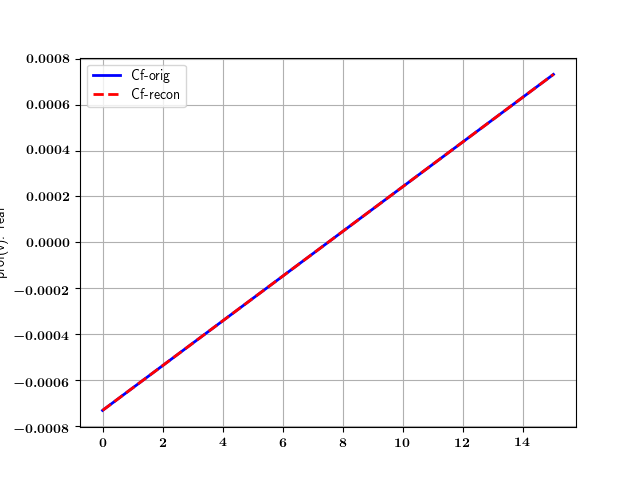

In [20]:
# ---------------------------------------------------------------
# --- PRINT and PLOT: Compare original and reconstructed matrices ---
# ---------------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(kin)

# --- Cf ---
id_shift = 2
kin.print_compare_reconstructed(nv_work, Cf_orig, Cf_recon, id_shift, id_shift, flag_only_real = True)
kin.plot_compare_reconstructed(nv_work, Cf_orig, Cf_recon, id_shift, id_shift, "Cf-orig", "Cf-recon", True)
del id_shift




# def print_compare(nv, B1, B2, ir_start, ic_start, flag_only_real = False):
#     Nv = 1<<nv
    
#     r0, c0 = ir_start*Nv, ic_start*Nv
#     ff = [10, 3, "e"]
    
#     print("\n--- I: real ---")
#     B1.print_matrix_real(r0, c0, Nv,ff, Nv, " ")
#     print("\n\n--- II: real ---")
#     B2.print_matrix_real(r0, c0, Nv,ff, Nv, " ")
    
#     if not flag_only_real:
#         print("\n--- I: imag ---")
#         B1.print_matrix_imag(r0, c0, Nv,ff, Nv, " ")
#         print("\n\n--- II: imag ---")
#         B2.print_matrix_imag(r0, c0, Nv,ff, Nv, " ")
        
# # --- Cf ---
# id_shift = 2
# print_compare(nv_work, Cf_orig, Cf_recon, id_shift, id_shift, flag_only_real = True)
# del id_shift

In [17]:
# ---------------------------------------------------------------
# --- Print DE submatrix ---
# ---------------------------------------------------------------
mix.reload_module(mix)
def print_submatrix(nx, nv, B, ir_block, shift_r = 1, shift_c = 0):
    Nx = 1<<nx
    Nv = 1<<nv
    Nvar = Nx * Nv
    
    coef_d = 1./np.sqrt(2)
    print()
    print("coef_d**(nv+2): {:0.3f}".format(coef_d**(nv+2)))

    i_loc = ir_block * Nv
    ir_start = shift_r*Nvar + i_loc
    ic_start = shift_c*Nvar + i_loc
    
    B.print_matrix_real(
        ir_start, ic_start, Nv,
        ff=[6, 3, "f"], 
        n_in_row = Nv, 
        gap_be = " ", 
    )
# -------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------
shift_r, shift_c = 0, 1

dd_print, nx_loc, nv_loc = dd_44, 4, 4
Nx_loc = 1<<nx_loc
print_submatrix(nx_loc, nv_loc, dd_print["A"], 0,        shift_r, shift_c ) 
print_submatrix(nx_loc, nv_loc, dd_print["A"], 1,        shift_r, shift_c ) 
print_submatrix(nx_loc, nv_loc, dd_print["A"], Nx_loc-1, shift_r, shift_c )

dd_print, nx_loc, nv_loc = dd_45, 4, 5
Nx_loc = 1<<nx_loc
print_submatrix(nx_loc, nv_loc, dd_print["A"], 0,  shift_r, shift_c ) 

dd_print, nx_loc, nv_loc = dd_55, 5, 5
Nx_loc = 1<<nx_loc
print_submatrix(nx_loc, nv_loc, dd_print["A"], 0,  shift_r, shift_c ) 

del nx_loc, nv_loc, Nx_loc


coef_d**(nv+2): 0.125
--- 0:   0.125  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 1:   0.125  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 2:   0.125  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 3:   0.125  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 4:   0.125  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 5:   0.125  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 6:   0.125  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 7:   0.125  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 8:   0.125  0

In [11]:
# ---------------------------------------------------------------
# --- Print Df submatrix ---
# ---------------------------------------------------------------
mix.reload_module(mix)

shift_r, shift_c = 1, 0

dd_print, nx_loc, nv_loc = dd_44, 4, 4
Nx_loc = 1<<nx_loc
print_submatrix(nx_loc, nv_loc, dd_print["A"], 0,         shift_r, shift_c) 
print_submatrix(nx_loc, nv_loc, dd_print["A"], 1,         shift_r, shift_c)
print_submatrix(nx_loc, nv_loc, dd_print["A"], Nx_loc-1,  shift_r, shift_c)

dd_print, nx_loc, nv_loc = dd_45, 4, 5
Nx_loc = 1<<nx_loc
print_submatrix(nx_loc, nv_loc, dd_print["A"], 0,  shift_r, shift_c)

dd_print, nx_loc, nv_loc = dd_55, 5, 5
Nx_loc = 1<<nx_loc
print_submatrix(nx_loc, nv_loc, dd_print["A"], 0,  shift_r, shift_c)

del nx_loc, nv_loc, Nx_loc


coef_d**(nv+2): 0.125
--- 0:   0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125
--- 1:   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 2:   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 3:   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 4:   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 5:   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 6:   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 7:   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 8:   0.000  0

In [40]:
# ---------------------------------------------------------------
# --- Print DS submatrix ---
# ---------------------------------------------------------------
mix.reload_module(mix)

shift_r, shift_c = 1, 1

dd_print, nx_loc, nv_loc = dd_44, 4, 4
Nx_loc = 1<<nx_loc
print_submatrix(nx_loc, nv_loc, dd_print["A"], 0,         shift_r, shift_c) 
print_submatrix(nx_loc, nv_loc, dd_print["A"], 1,         shift_r, shift_c)
print_submatrix(nx_loc, nv_loc, dd_print["A"], Nx_loc-1,  shift_r, shift_c)

dd_print, nx_loc, nv_loc = dd_45, 4, 5
Nx_loc = 1<<nx_loc
print_submatrix(nx_loc, nv_loc, dd_print["A"], 0,  shift_r, shift_c)

dd_print, nx_loc, nv_loc = dd_55, 5, 5
Nx_loc = 1<<nx_loc
print_submatrix(nx_loc, nv_loc, dd_print["A"], 0,  shift_r, shift_c)

del nx_loc, nv_loc, Nx_loc


coef_d**(nv+2): 0.125
--- 0:   0.500  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 1:   0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 2:   0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 3:   0.000  0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 4:   0.000  0.000  0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 5:   0.000  0.000  0.000  0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 6:   0.000  0.000  0.000  0.000  0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 7:   0.000  0.000  0.000  0.000  0.000  0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 8:   0.000  0

In [20]:
# ---------------------------------------------------------------
# --- Compare original and reconstructed Cf ---
# ---------------------------------------------------------------
mix.reload_module(mix)

ir_block = 0
print_submatrix(nx_work, nv_work, Cf_orig, ir_block, 0, 0)
print_submatrix(nx_work, nv_work, Cf_recon, ir_block, 0, 0)



coef_d**(nv+2): 0.125
--- 0:  -0.001 -0.001 -0.001 -0.000 -0.000 -0.000 -0.000 -0.000  0.000  0.000  0.000  0.000  0.000  0.001  0.001  0.001
--- 1:   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 2:   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 3:   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 4:   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 5:   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 6:   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 7:   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 8:   0.000  0

<IPython.core.display.Javascript object>


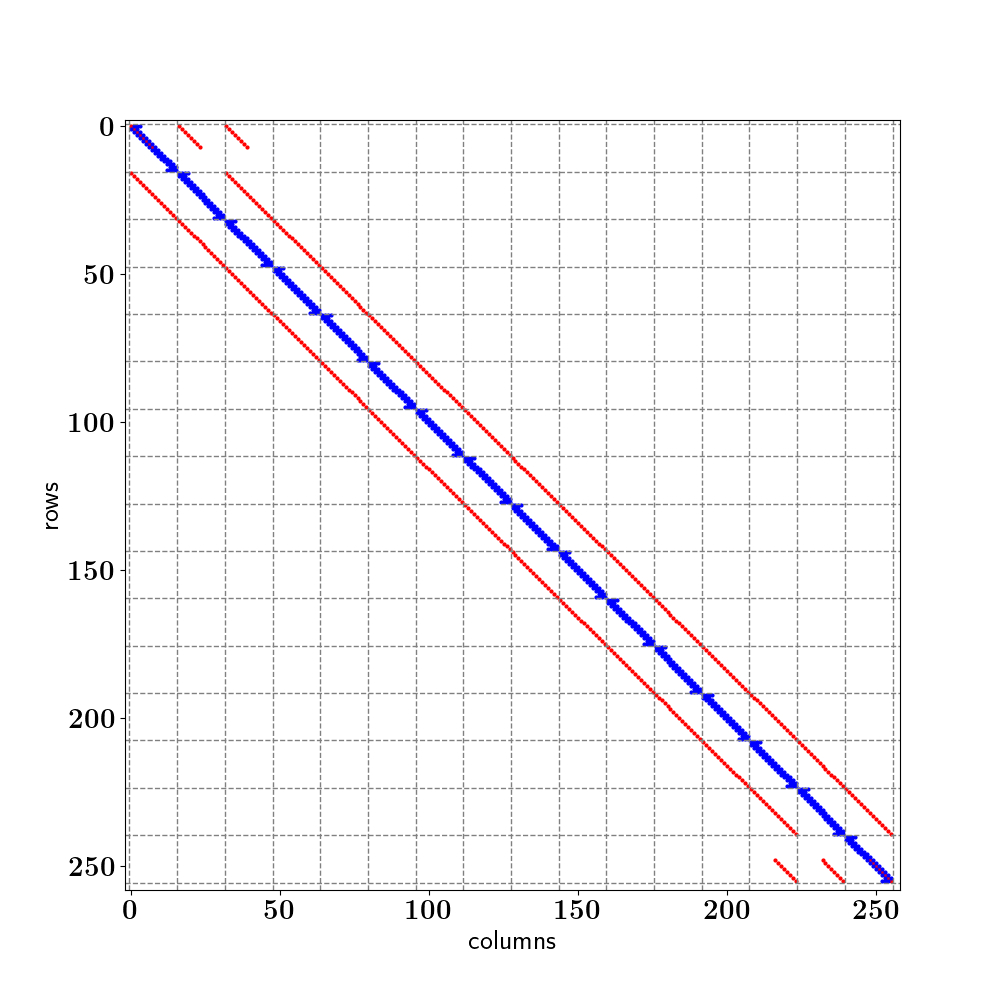

In [58]:
# --------------------------------------------------------------
# --- PLOT the matrix structure in different colors ---
# --------------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(kin)

# fig_B_colored_structure = kin.plot_colored_A_structure(
#     Nx_work, Nv_work, 
#     B_F_fixed, B_F_profile, B_CE, B_Cf, B_S,
#     flag_save = False, 
#     path_save = path_save_, 
#     fontsize = 20, 
#     cmap='bwr'
# )
fig_B_colored_structure = kin.plot_colored_F_structure(
    Nx_work, Nv_work, 
    B_F_fixed, B_F_profile,
    flag_save = False, 
    path_save = path_save_, 
    fontsize = 20, 
    cmap='bwr'
)

<IPython.core.display.Javascript object>


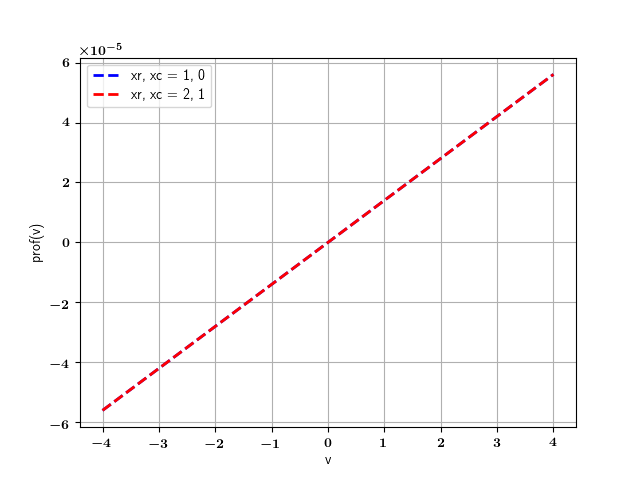

/media/work/docs/codes/QuCF/scripts-py/env/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [47]:
# --------------------------------------------------------------
# --- PLOT profiles of the submatrix F ---
# --------------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(kin)

def add_F_profile(ax, ixr_start, ixc_start, F_prof, one_color):
    
    idr_start = ixr_start*Nv_work
    idc_start = ixc_start*Nv_work
    
    one_block = np.array(F_prof.get_slice(idr_start, idc_start, Nv_work).get_values())
    
    if ixr_start == 0:
        one_block = np.pad(one_block, (0,Nv_work//2))
    if ixr_start == (Nx_work-1):
        one_block = np.pad(one_block, (Nv_work//2,0))
    
    ax.plot(v_work, one_block, one_color, linewidth = 2, linestyle='--', label='xr, xc = {:d}, {:d}'.format(ixr_start, ixc_start))
    
    return
# ----------------------------------------
fig = plt.figure()
ax = fig.add_subplot(111)

# add_F_profile(ax, 0, 0, B_F_profile, "b")
# add_F_profile(ax, 0, 1, B_F_profile, "r")
# add_F_profile(ax, 0, 2, B_F_profile, "g")

# add_F_profile(ax, 1, 1+1, B_F_profile, "b")
# add_F_profile(ax, 2, 2+1, B_F_profile, "r")
# add_F_profile(ax, 3, 3+1, B_F_profile, "g")
# add_F_profile(ax, 4, 4+1, B_F_profile, "gray")



ii_x = 1
add_F_profile(ax, ii_x, ii_x-1, B_F_profile, "b")
add_F_profile(ax, ii_x+1, ii_x+1-1, B_F_profile, "r")
# add_F_profile(ax, ii_x+2, ii_x+2-1, B_F_profile, "g")
# add_F_profile(ax, ii_x+3, ii_x+3-1, B_F_profile, "gray")


# add_F_profile(ax, Nx_work-1, Nx_work-1, B_F_profile, "b")
# add_F_profile(ax, Nx_work-1, Nx_work-2, B_F_profile, "r")
# add_F_profile(ax, Nx_work-1, Nx_work-3, B_F_profile, "g")


plt.xlabel('v')
plt.ylabel("prof(v)")
ax.legend()
plt.grid(True)
plt.show()

del add_F_profile, ii_x

<IPython.core.display.Javascript object>


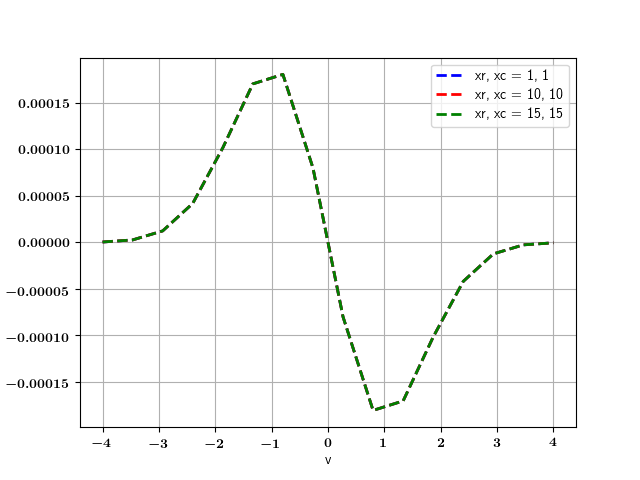

<IPython.core.display.Javascript object>


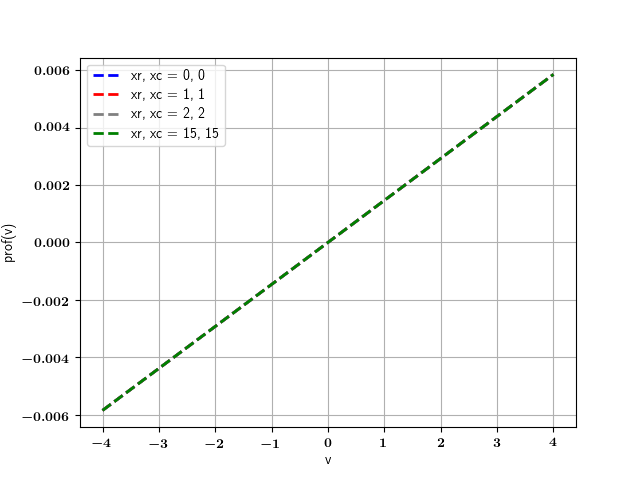

In [13]:
# --------------------------------------------------------------
# --- PLOT profiles of the submatrix CE and Cf ---
# --------------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(kin)

def add_C_real(ax, ixr_start, ixc_start, C_prof, one_color):
    
    idr_start = ixr_start*Nv_work
    idc_start = ixc_start*Nv_work
    
    one_block = np.array(C_prof.get_slice(idr_start, idc_start, Nv_work).get_values().real)
    ax.plot(v_work, one_block, one_color, linewidth = 2, linestyle='--', label='xr, xc = {:d}, {:d}'.format(ixr_start, ixc_start))
    
    return
# ----------------------------------------


# ***********************************************
# *** CE profiles ***
fig = plt.figure()
ax = fig.add_subplot(111)

# ii_x = Nx_work-4
# add_C_real(ax, ii_x,   ii_x,   B_CE, "b")
# add_C_real(ax, ii_x+1, ii_x+1, B_CE, "r")
# add_C_real(ax, ii_x+2, ii_x+2, B_CE, "g")
# add_C_real(ax, ii_x+3, ii_x+3, B_CE, "gray")

add_C_real(ax, 1,   1,               B_CE, "b")
add_C_real(ax, 10, 10,               B_CE, "r")
add_C_real(ax, Nx_work-1, Nx_work-1, B_CE, "g")

plt.xlabel('v')
plt.ylabel("prof(v)")
ax.legend()
plt.grid(True)
plt.show()

# ***********************************************
# *** Cf profiles ***
fig = plt.figure()
ax = fig.add_subplot(111)

# ii_x = Nx_work-4
# add_C_real(ax, ii_x,   ii_x,   B_Cf, "b")
# add_C_real(ax, ii_x+1, ii_x+1, B_Cf, "r")
# add_C_real(ax, ii_x+2, ii_x+2, B_Cf, "g")
# add_C_real(ax, ii_x+3, ii_x+3, B_Cf, "gray")


add_C_real(ax, 0, 0,                 B_Cf, "b")
add_C_real(ax, 1, 1,                 B_Cf, "r")
add_C_real(ax, 2, 2,                 B_Cf, "gray")
add_C_real(ax, Nx_work-1, Nx_work-1, B_Cf, "g")

plt.xlabel('v')
plt.ylabel("prof(v)")
ax.legend()
plt.grid(True)
plt.show()

del add_C_real

<IPython.core.display.Javascript object>


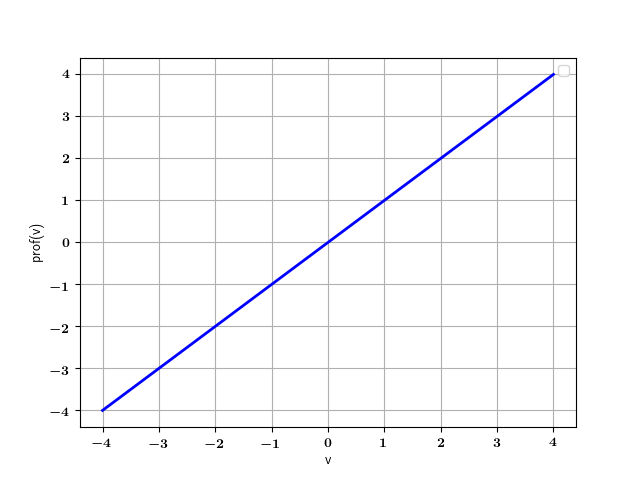

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [80]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(v_work, np.max(v_work)*np.arcsin(np.sin(v_work/np.max(v_work))), "b", linewidth = 2, linestyle='-')

plt.xlabel('v')
plt.ylabel("prof(v)")
ax.legend()
plt.grid(True)
plt.show()

In [ ]:
# ---------------------------------------------------------------
# --- TEST the SIN GATE --
# ---------------------------------------------------------------
# x_max = 0.003
x_max = -1

alpha_0 = - x_max
alpha_1 = x_max * Nv_work/(Nv_work - 1)

print("nx \t\t{:d}".format(nv_work))
print("alpha_0 \t{:0.12f}".format(alpha_0))
print("alpha   \t{:0.12f}".format(alpha_1))
del alpha_0, alpha_1

# --- Read results from the SIN gate ---
mix.reload_module(qucf_r)

print()
dd_sin_test = qucf_r.read_matrix_sparse(
    "/media/work/docs/codes/QuCF/simulations/tests-preliminary/sin-gate/", 
    "sin_OUTPUT.hdf5"
) 

dd_sin_test["A"].print_matrix_real(
    0,0,Nv_work,
    ff=[13, 3, "f"], 
    n_in_row = Nv_work,
)


# --- compare the grid computed by the circuit and the original grid:
dx = 2*x_max / (Nv_work - 1)
print()
for ii in range(len(dd_sin_test["A"].get_values())):
    x1 = - x_max + dx *ii
    if not mix.compare_complex_values(x1, dd_sin_test["A"].get_values()[ii]):
        print(
            np.abs(x1 - dd_sin_test["A"].get_values()[ii].real)
        )
del dx, x1

In [ ]:
# ---------------------------------------------------------------
# --- TEST the x*gauss CIRCUIT --
# ---------------------------------------------------------------
mix.reload_module(qucf_r)

print()
dd_sin_test = qucf_r.read_matrix_sparse(
    "/media/work/docs/codes/QuCF/simulations/tests-preliminary/sin-gate/", 
    "sin_OUTPUT.hdf5"
) 

print()
dd_xgauss_test = qucf_r.read_matrix_sparse(
    "/media/work/docs/codes/QuCF/simulations/tests-preliminary/qsvt-gauss/", 
    "gauss_OUTPUT.hdf5"
) 


dd_xgauss_test["A"].print_matrix_imag(
    0, 0, Nv_work,
    ff=[13, 3, "e"], 
    n_in_row = Nv_work,
)



# --- print the resulting curve ---
fig = plt.figure()
ax = fig.add_subplot(111)

x_max_coord = 1.0
dx_coord = 2*x_max_coord / (Nv_work - 1)

# coord_grid = np.array(dd_sin_test["A"].get_values())
coord_grid = np.array([-1.0 + ii*dx_coord for ii in range(Nv_work)])
check_pol = coord_grid * np.exp(- coord_grid**2/(2*0.2**2))

ax.plot(
    dd_sin_test["A"].get_values(), 
    dd_xgauss_test["A"].get_values().imag, 
    "b", linewidth = 2, linestyle='-'
)
ax.plot(
    coord_grid, -check_pol, 
    "r", linewidth = 2, linestyle='--'
)

plt.xlabel('v')
plt.ylabel("prof(v)")
ax.legend()
plt.grid(True)
plt.show()

del coord_grid, x_max_coord, dx_coord